In [31]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
import sklearn
import sklearn.model_selection
import multiprocessing
from glob import glob
import matplotlib.patches as mpatches

In [2]:
scores_msmlag10ns_variousvamps = np.load('scores_msmlag10ns_variousvamps.npy')

In [12]:
scores_msmlag10ns_variousvamps[1].shape

(78,)

In [13]:
scores_msmlag10ns_variousvamps[1][0]

[[(2.2202176234173319,
   2.1561918917671852,
   2.2952180745345427,
   2.2498043887218979),
  (15, 21)],
 [(2.2202176234173319,
   2.1561918917671852,
   2.2952180745345427,
   2.2498043887218979),
  (15, 21)],
 [(2.2202176234173319,
   2.1561918917671852,
   2.2952180745345427,
   2.2498043887218979),
  (15, 21)],
 [(1.9181426056433273,
   1.9224480289429584,
   1.944857136399591,
   1.9498829730427794),
  (15, 21)],
 [(1.9181426056433273,
   1.9224480289429584,
   1.944857136399591,
   1.9498829730427794),
  (15, 21)],
 [(1.9181426056433273,
   1.9224480289429584,
   1.944857136399591,
   1.9498829730427794),
  (15, 21)],
 [(2.1833171528274669,
   2.2406894220872,
   2.2222707276113454,
   2.2870210430075009),
  (15, 21)],
 [(2.1833171528274669,
   2.2406894220872,
   2.2222707276113454,
   2.2870210430075009),
  (15, 21)],
 [(2.1833171528274669,
   2.2406894220872,
   2.2222707276113454,
   2.2870210430075009),
  (15, 21)],
 [(1.9055438810033187,
   1.9259088912832716,
   1.9376988

In [14]:
len(scores_msmlag10ns_variousvamps[1][0])

60

In [28]:
a = [1,2,3,4,5,6]

In [ ]:
# so we have to do this 6 times - we have eigenvalues 5,10,50 and VAMP-1 and VAMP-2

In [ ]:
# VAMP-1, 5 eigen

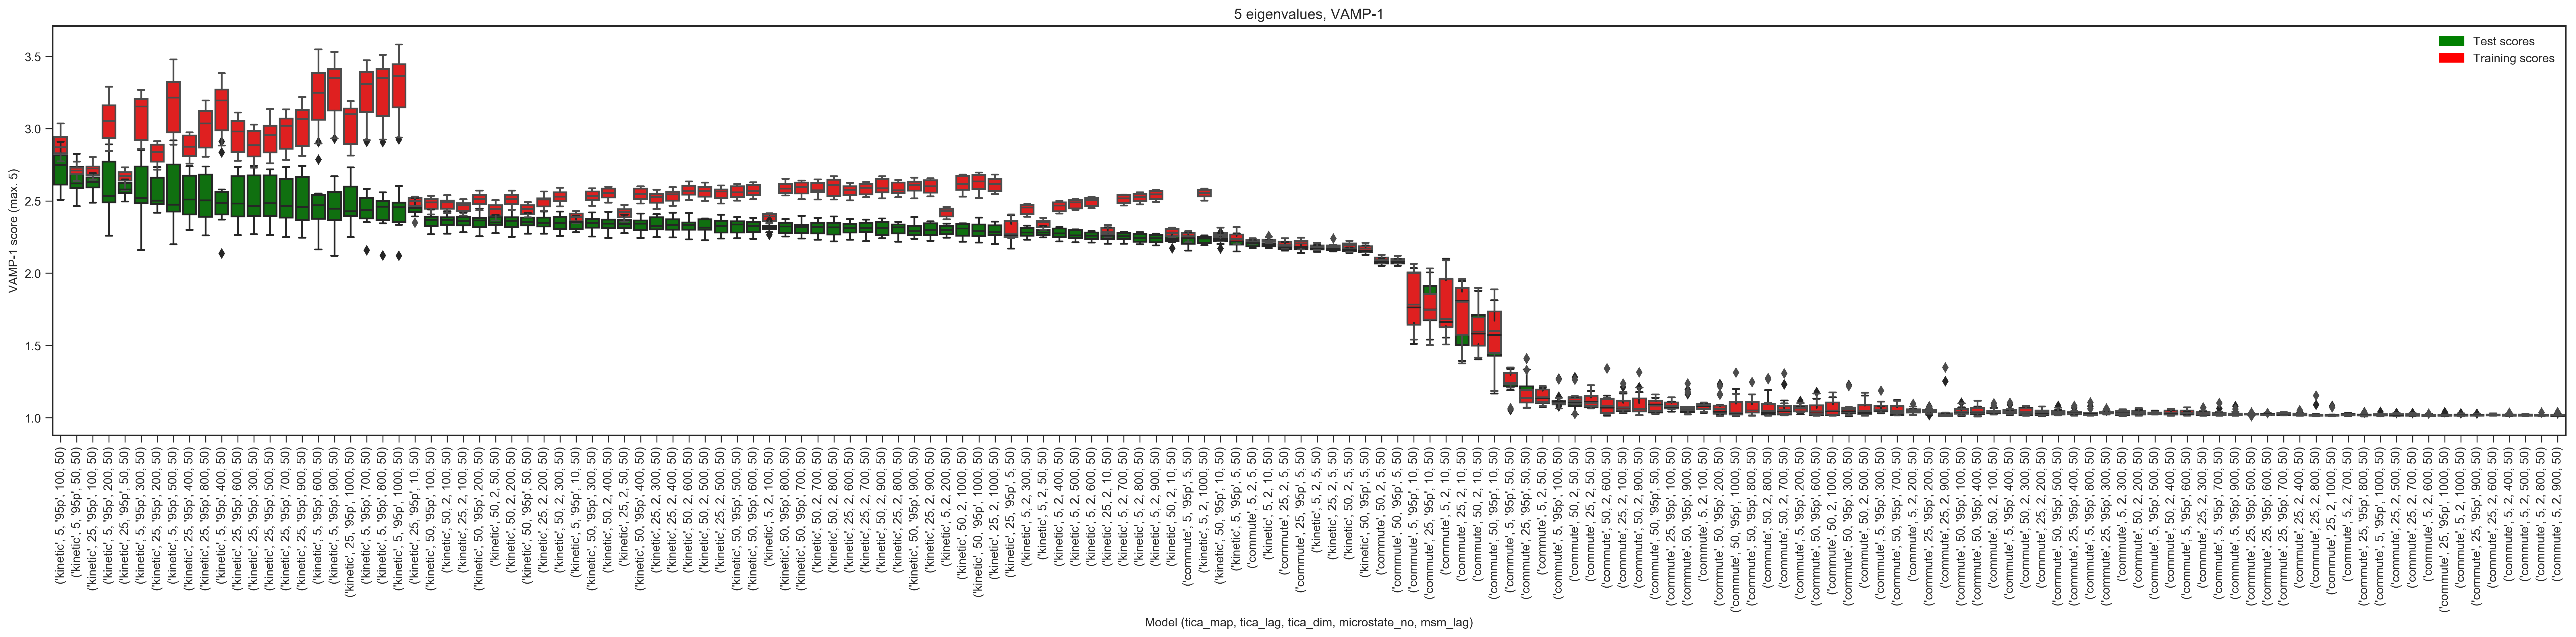

In [45]:
output = scores_msmlag10ns_variousvamps

# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[0::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[0::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[0::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[0::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-1 score (max. 5)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('5 eigenvalues, VAMP-1')
plt.tight_layout()

plt.savefig('chignolin_both_scores_msmlag10ns_variousvamps_5eigen_vamp1.png', dpi=300)
plt.show()

In [34]:
# VAMP-1, 10 eigen

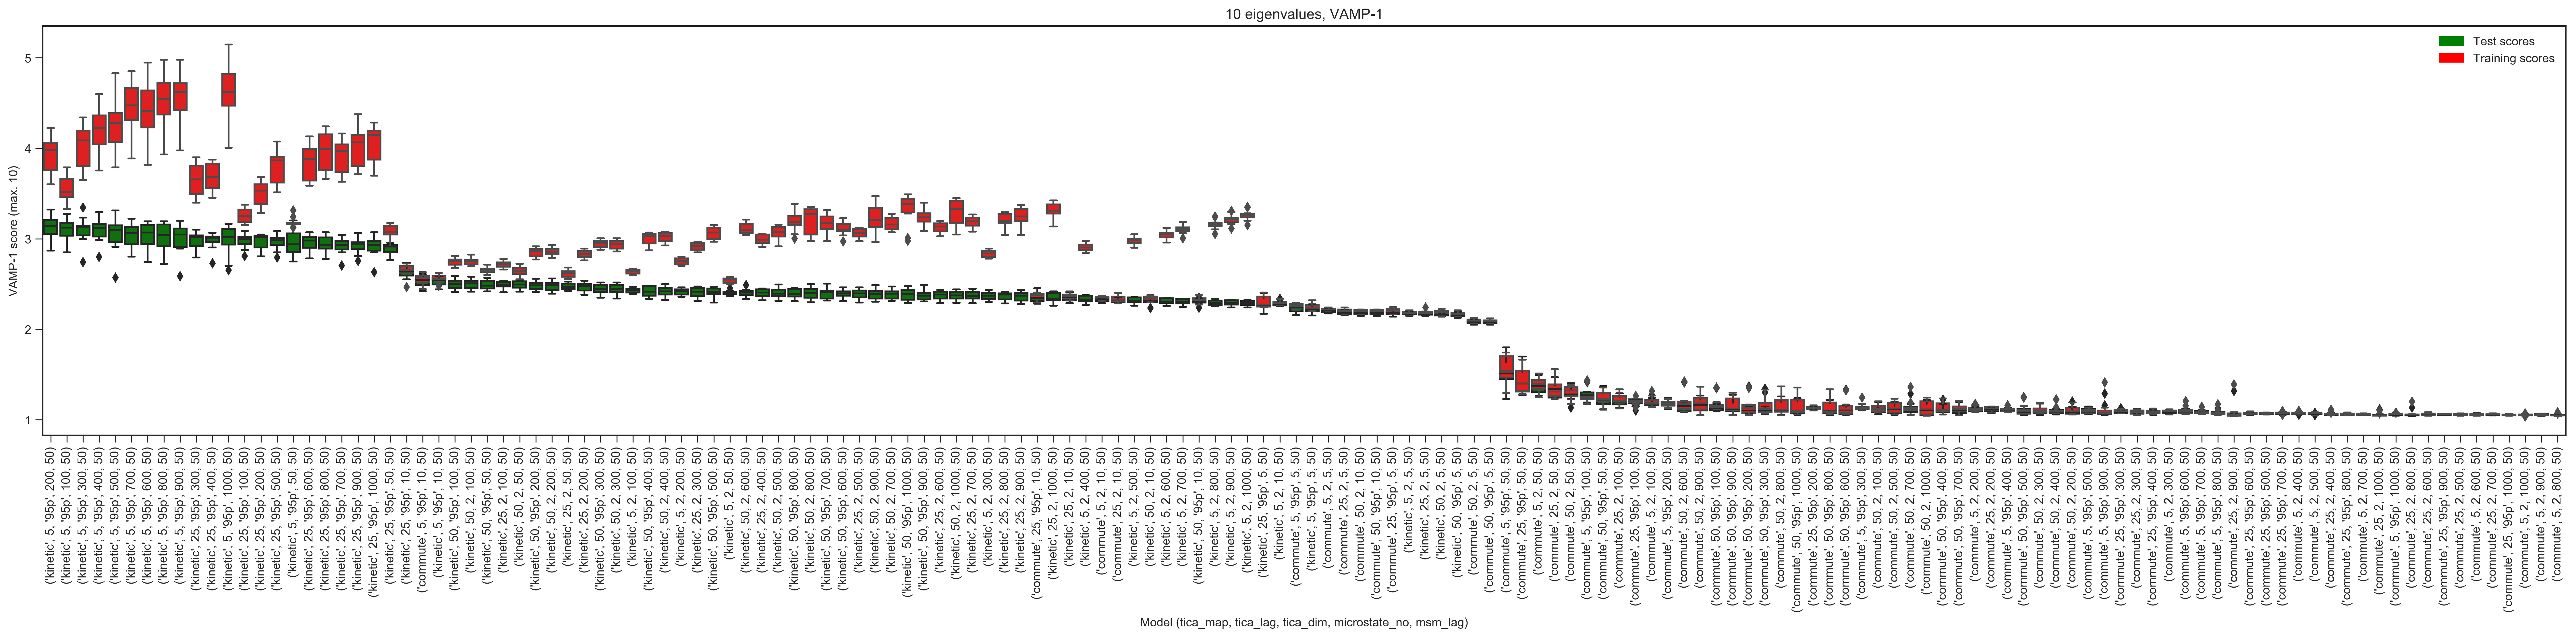

In [46]:
output = scores_msmlag10ns_variousvamps

# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[1::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[1::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[1::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[1::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-1 score (max. 10)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('10 eigenvalues, VAMP-1')
plt.tight_layout()

plt.savefig('chignolin_both_scores_msmlag10ns_variousvamps_10eigen_vamp1.png', dpi=300)
plt.show()

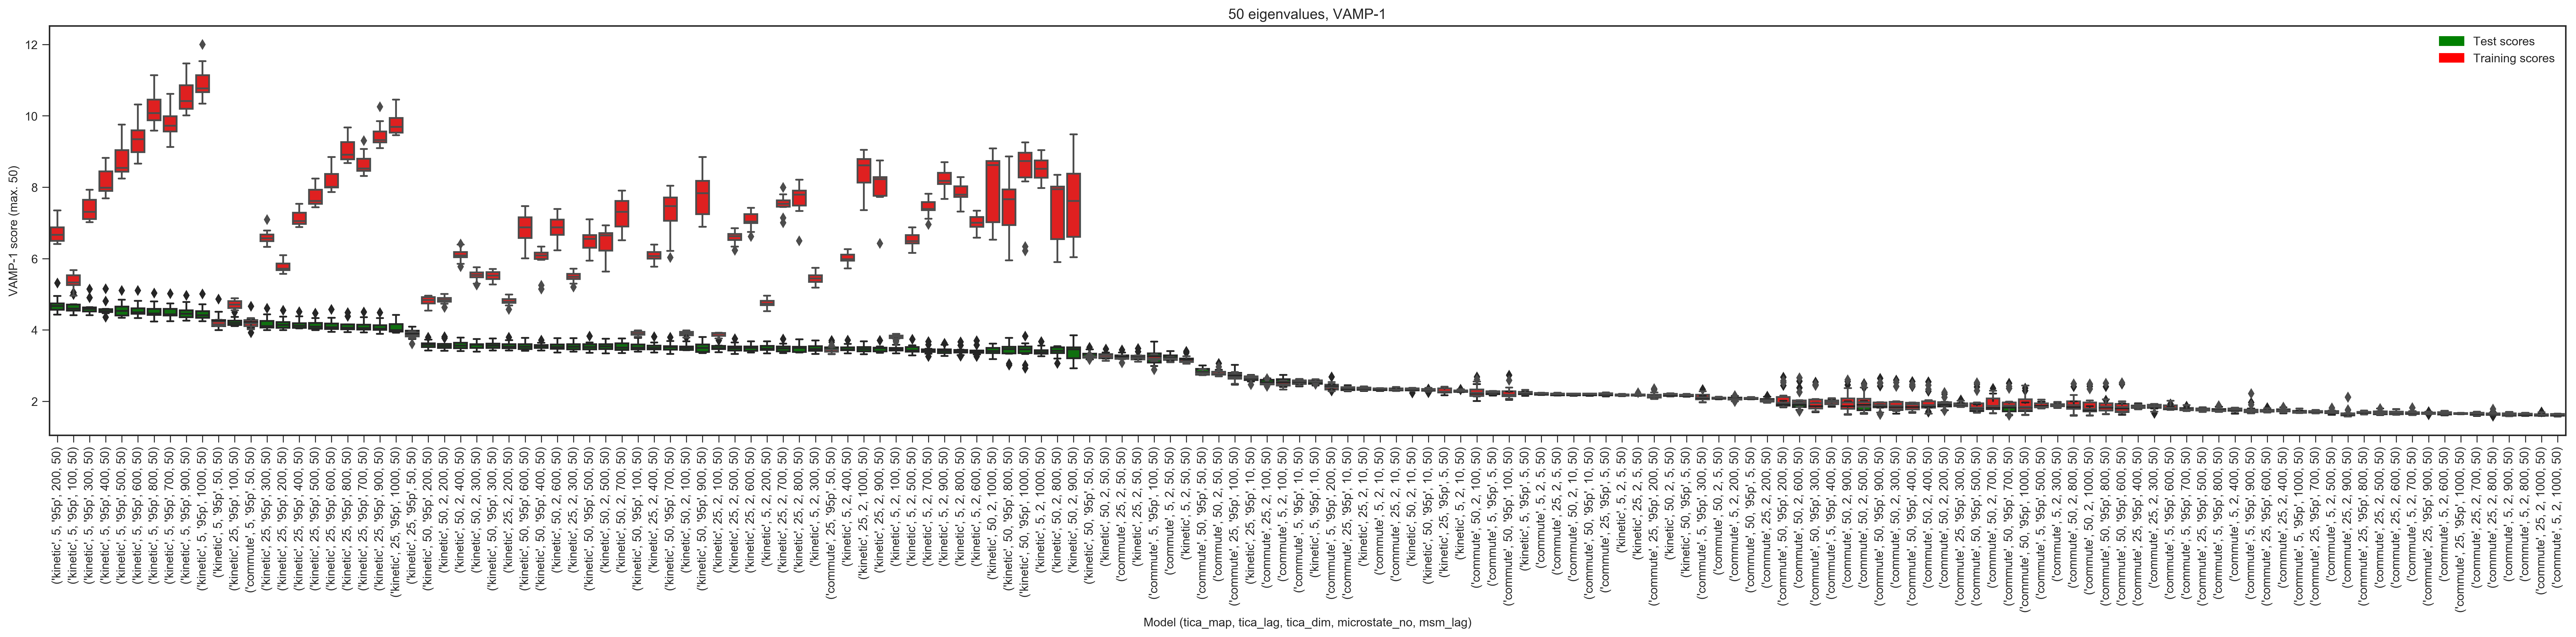

In [47]:
output = scores_msmlag10ns_variousvamps

# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[2::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[2::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[2::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[2::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-1 score (max. 50)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('50 eigenvalues, VAMP-1')
plt.tight_layout()

plt.savefig('chignolin_both_scores_msmlag10ns_variousvamps_50eigen_vamp1.png', dpi=300)
plt.show()

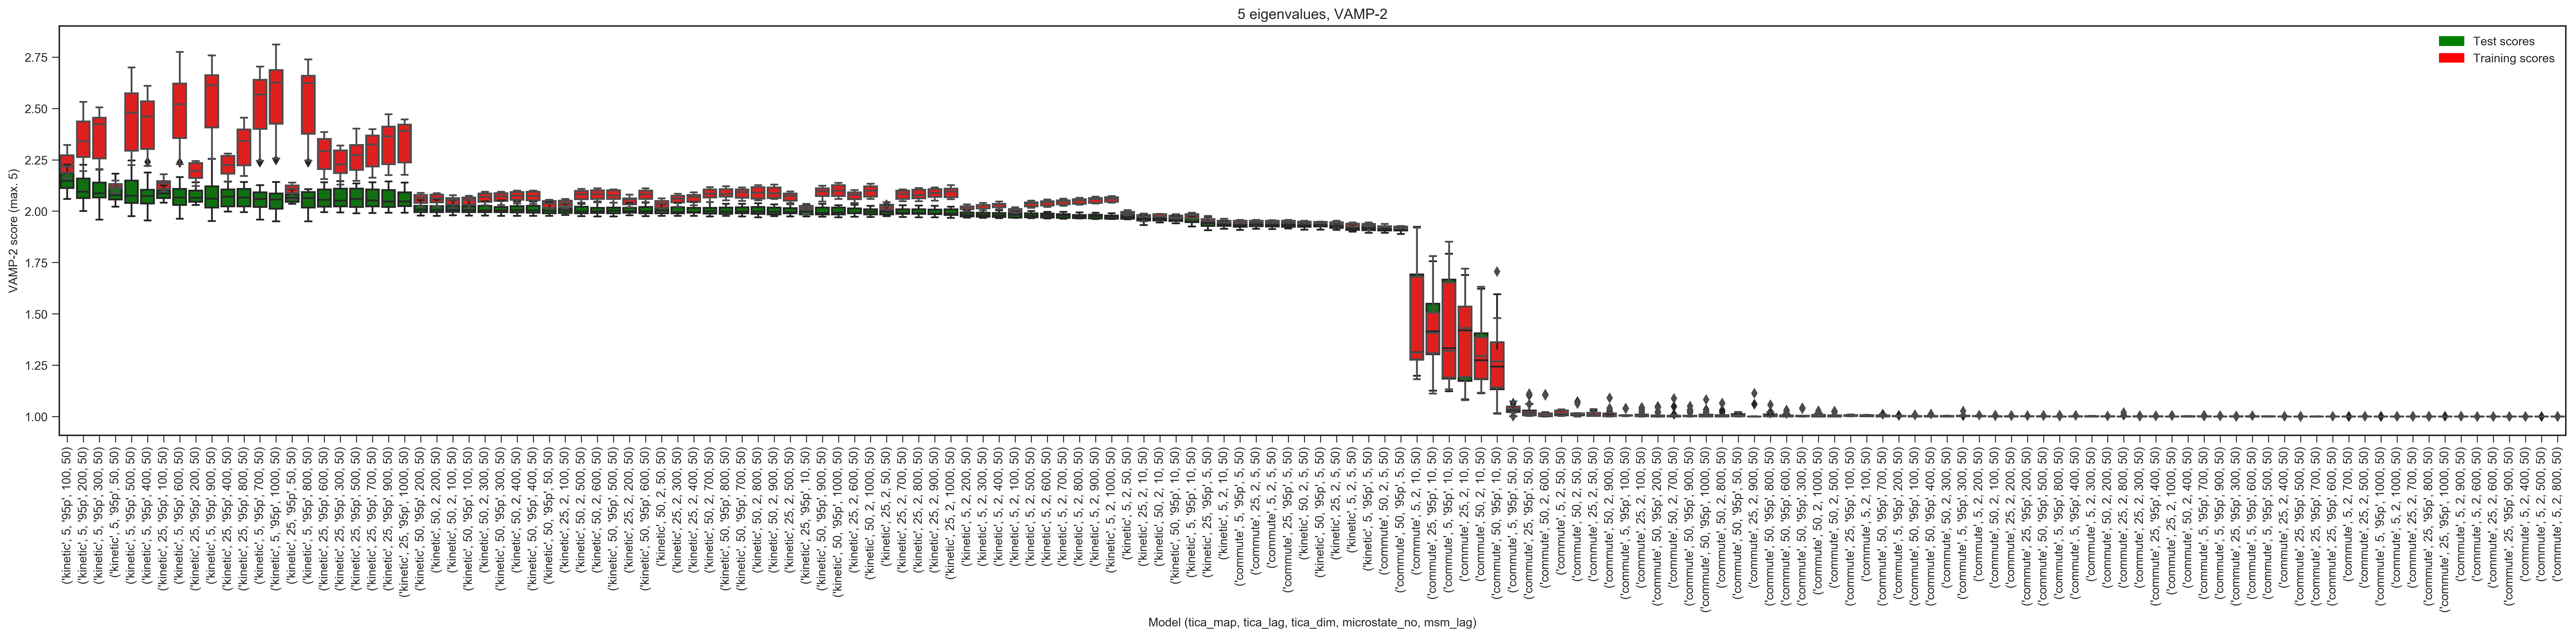

In [48]:
output = scores_msmlag10ns_variousvamps

# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[3::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[3::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[3::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[3::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. 5)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('5 eigenvalues, VAMP-2')
plt.tight_layout()

plt.savefig('chignolin_both_scores_msmlag10ns_variousvamps_5eigen_vamp2.png', dpi=300)
plt.show()

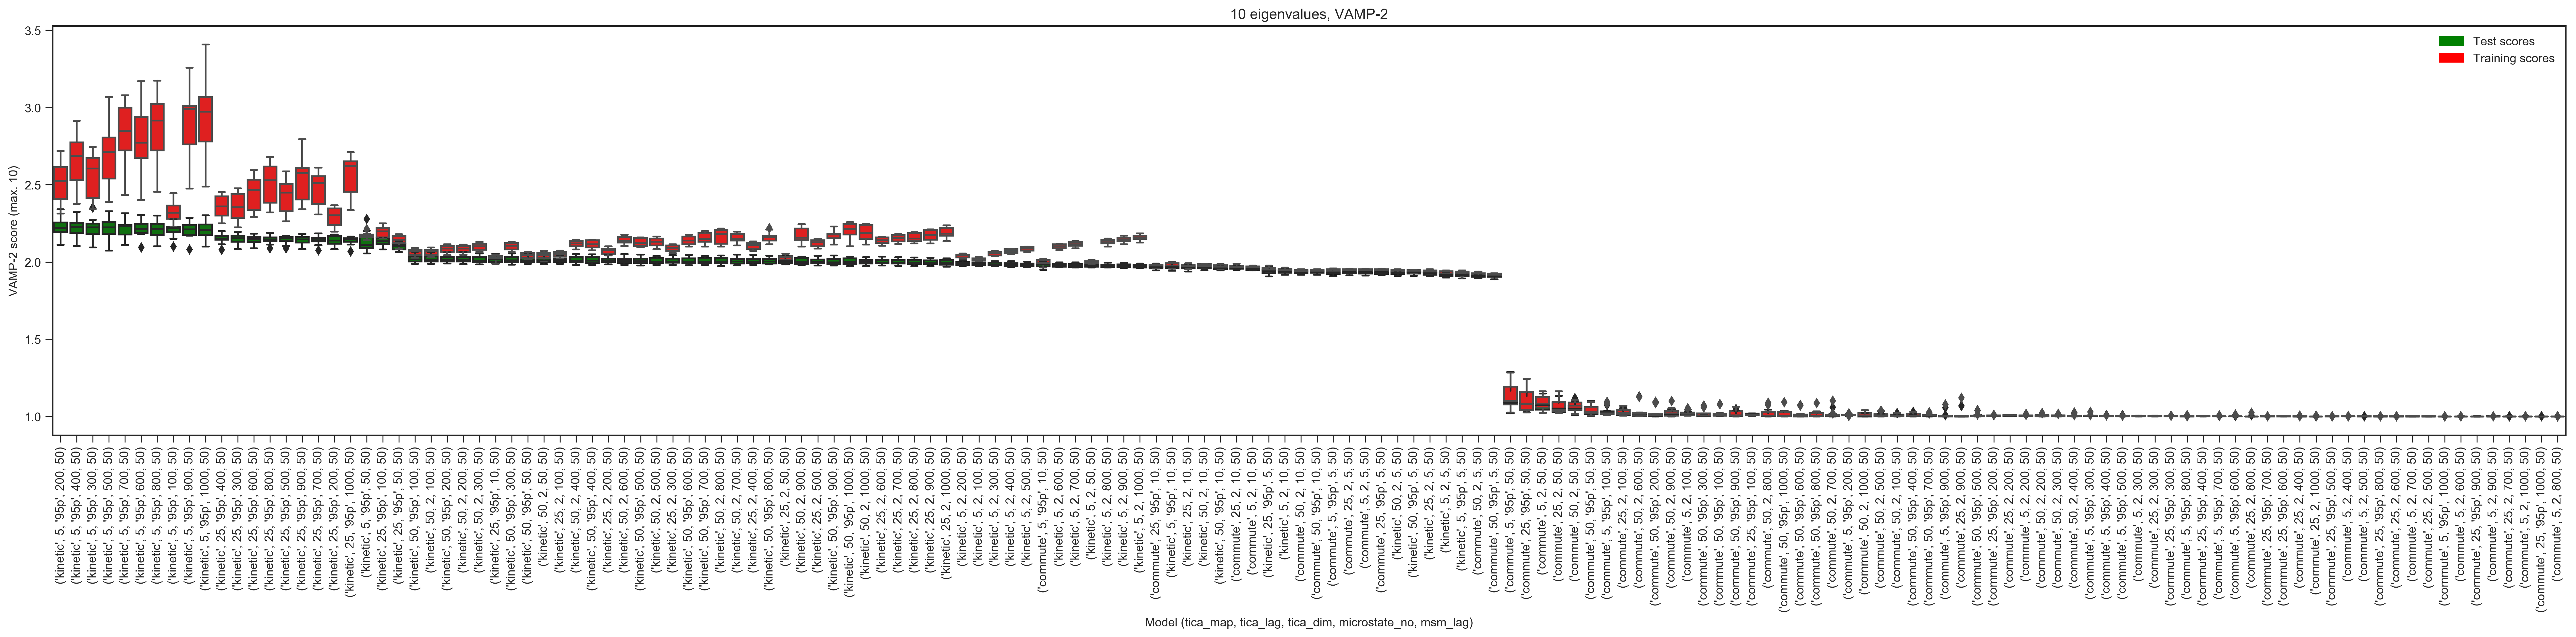

In [49]:
output = scores_msmlag10ns_variousvamps

# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[4::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[4::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[4::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[4::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. 10)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('10 eigenvalues, VAMP-2')
plt.tight_layout()

plt.savefig('chignolin_both_scores_msmlag10ns_variousvamps_10eigen_vamp2.png', dpi=300)
plt.show()

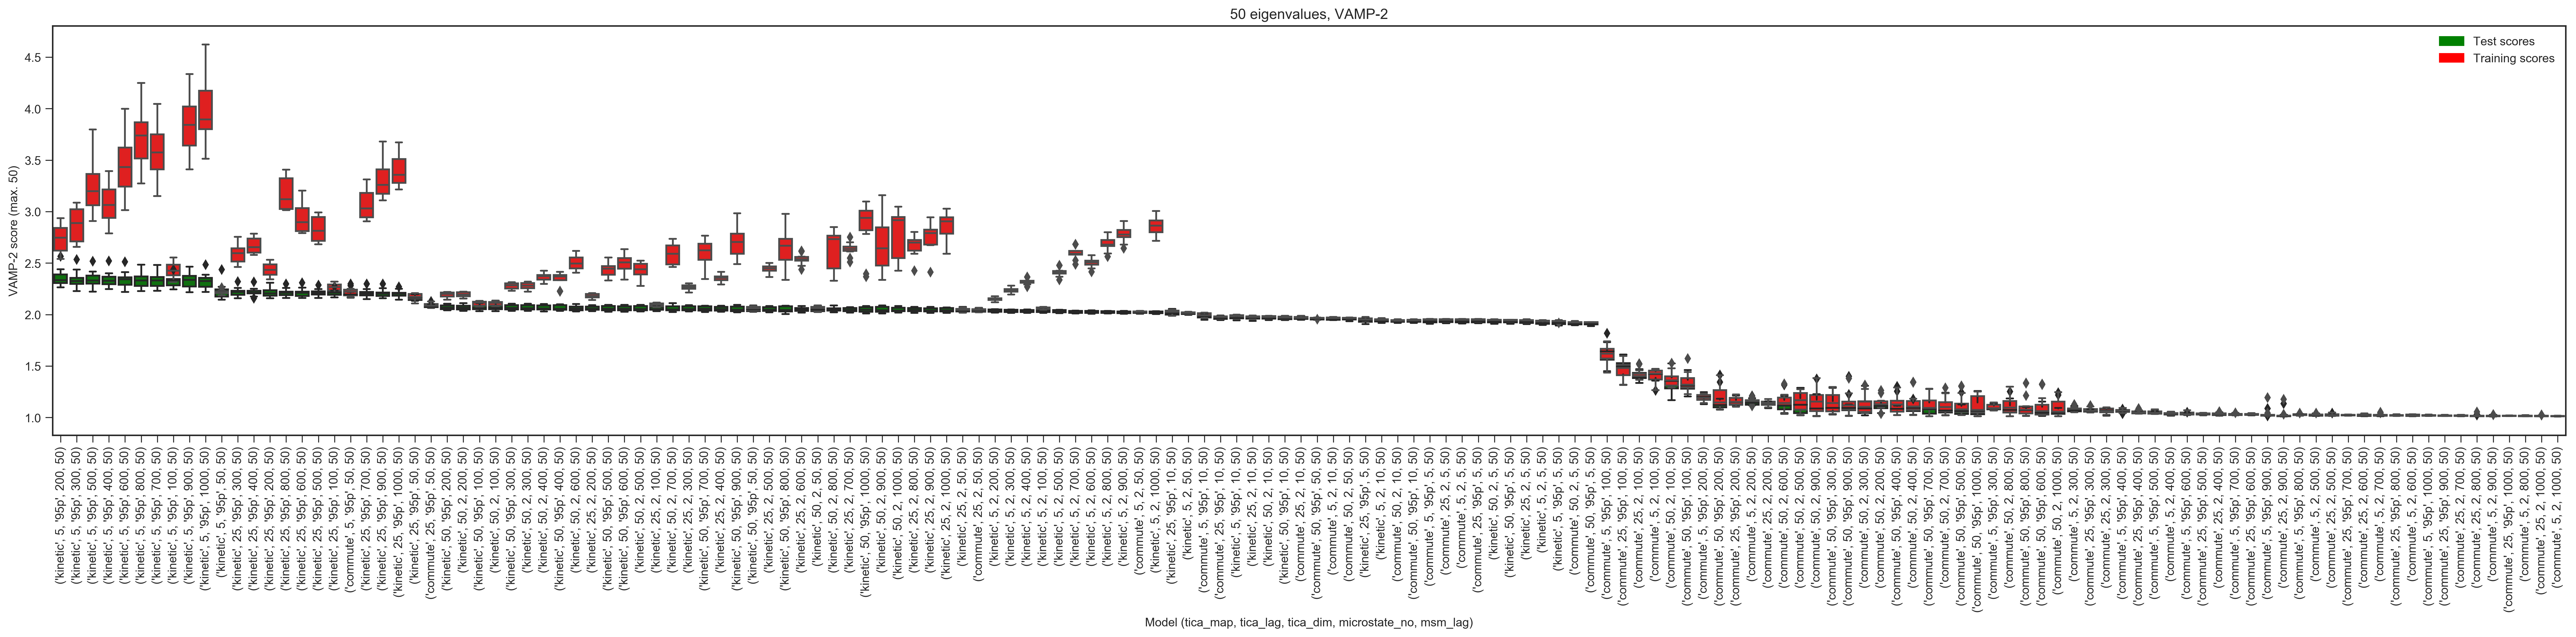

In [50]:
output = scores_msmlag10ns_variousvamps

# test scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[5::6]:
            y_kinetic_.append(replicate[0][0])
            y_commute_.append(replicate[0][1])
    else:
        for replicate in model[5::6]:
            y_kinetic_.append(replicate[0])
            y_commute_.append(replicate[1])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order_means = []
for index, model in enumerate(x):
    order_means.append((model, np.mean(y[index])))
order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
order = [i[0] for i in order_means]
order_test = order

plt.figure(figsize=(30,7.5), dpi=300)
sns.boxplot(x=x, y=y, order=order, color='green')

# training scores

x = []

for model in output[0]:
    x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
for model in output[0]:
    x.append(str(('commute', model[0], model[1], model[2], model[3])))        

y_kinetic = []
y_commute = []

for model in output[1]:
    y_kinetic_ = []
    y_commute_ = []
    if isinstance(model[0], list):
        for replicate in model[5::6]:
            y_kinetic_.append(replicate[0][2])
            y_commute_.append(replicate[0][3])
    else:
        for replicate in model[5::6]:
            y_kinetic_.append(replicate[2])
            y_commute_.append(replicate[3])
    y_kinetic.append(np.array(y_kinetic_))
    y_commute.append(np.array(y_commute_))
    
y = y_kinetic + y_commute

order = order_test

sns.boxplot(x=x, y=y, order=order, color='red')
plt.xlabel('Model (tica_map, tica_lag, tica_dim, microstate_no, msm_lag)')
plt.ylabel('VAMP-2 score (max. 50)')
plt.xticks(rotation=90)

test_patch = mpatches.Patch(color='green', label='Test scores')
train_patch = mpatches.Patch(color='red', label='Training scores')
plt.legend(handles=[test_patch, train_patch])

plt.title('50 eigenvalues, VAMP-2')
plt.tight_layout()

plt.savefig('chignolin_both_scores_msmlag10ns_variousvamps_50eigen_vamp2.png', dpi=300)
plt.show()